In [1]:

# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
     

In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("/Users/anhuynh/Downloads/archive (6)/cleansingWine.csv")

# 2. Drop any rows with null (missing) values
df = df.dropna()

# 3. Check the cleaned data
print(df.head())
print(f"\nRemaining rows after dropping nulls: {len(df)}")

   Unnamed: 0      id                          name      producer  nation  \
0           0  137197                        Altair        Altair   Chile   
1           1  137198               Altair, Sideral        Altair   Chile   
2           2  137199              Baron du Val Red  Baron du Val  France   
3           3  137200            Baron du Val White  Baron du Val  France   
4           4  137201  Benziger, Cabernet Sauvignon      Benziger     USA   

         local1 local2 local3 local4          varieties1  ...    use    abv  \
0  Rapel Valley    NaN    NaN    NaN  Cabernet Sauvignon  ...  Table  14~15   
1  Rapel Valley    NaN    NaN    NaN  Cabernet Sauvignon  ...  Table  14~15   
2           NaN    NaN    NaN    NaN            Carignan  ...  Table  11~12   
3           NaN    NaN    NaN    NaN            Carignan  ...  Table  11~12   
4    California    NaN    NaN    NaN  Cabernet Sauvignon  ...  Table  13~14   

  degree   sweet   acidity   body   tannin   price  year   ml 

/var/folders/v9/hcdjkhvd5nq6llrn61tfl3qr0000gn/T/ipykernel_83922/2720495365.py:4: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/anhuynh/Downloads/archive (6)/cleansingWine.csv")


In [3]:
# Example exchange rate
exchange_rate = 1350  # 1 USD = 1350 Won

# Convert 'price' from Won to USD
df['price_usd'] = df['price'] / exchange_rate

# Optional: round the USD price to 2 decimal places
df['price_usd'] = df['price_usd'].round(2)

# Check result
print(df[['price', 'price_usd']].head())


    price  price_usd
0  220000     162.96
1  110000      81.48
2       0       0.00
3       0       0.00
4       0       0.00


Epoch 1/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 30777.2148 - mae: 68.3253 - val_loss: 25906.0000 - val_mae: 61.6051
Epoch 2/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 19668.9531 - mae: 57.5042 - val_loss: 23781.7051 - val_mae: 57.3849
Epoch 3/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 19818.2812 - mae: 56.5326 - val_loss: 21566.0801 - val_mae: 54.0376
Epoch 4/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 16217.4551 - mae: 51.8109 - val_loss: 22054.2969 - val_mae: 55.2987
Epoch 5/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 14353.9082 - mae: 50.3270 - val_loss: 21441.4961 - val_mae: 54.4368
Epoch 6/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 11002.6025 - mae: 47.9181 - val_loss: 21733.4844 - val_mae: 56.4237
Epoch 7/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9094.3340 - mae: 45.1234 - val_loss: 22980.0605 - val_mae: 55.6304
Epoch 8/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 10841.8604 - mae: 45.5707 - val_loss: 22074.3

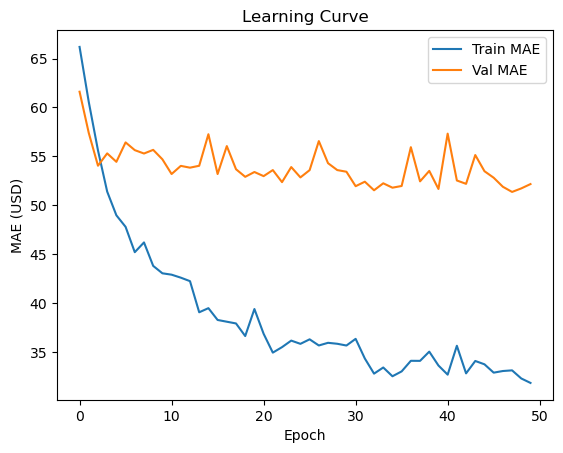

In [5]:

# ----- Imports ----- #
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

# ----- Configuration ----- #
num_layers = 3
neurons_per_layer = 32
activation_function = 'relu'
learning_rate = 0.01
batch_size = 32
num_epochs = 50
dropout_rate = 0.2
optimizer_choice = 'adam'

# ----- Prepare Data ----- #
X = df.drop(columns=['price', 'price_usd'])
y = df['price_usd']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ----- Build Model ----- #
model = Sequential()
for _ in range(num_layers):
    model.add(Dense(neurons_per_layer, activation=activation_function))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='linear'))

# Optimizer
optimizer = Adam(learning_rate=learning_rate) if optimizer_choice == 'adam' else SGD(learning_rate=learning_rate)

# Compile
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# ----- Train Model ----- #
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

# ----- Evaluate Model ----- #
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MAE (Mean Absolute Error): {test_mae:.2f} USD")

# ----- Predict and Calculate R² and MSE ----- #
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² (R-squared): {r2:.4f}")
print(f"MSE (Mean Squared Error): {mse:.2f} USD²")

# ----- Plot Learning Curve ----- #
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (USD)')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# 🧠 Brain: Hidden layers with ReLU
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer

# 🗣️ Mouth: Output layer with Linear
model.add(Dense(1, activation='linear'))  # Output layer for price prediction

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',          # Mean Squared Error for regression
              metrics=['mae'])     # Mean Absolute Error for evaluation


In [4]:


# ----- Prepare Data ----- #
X = df.drop(columns=['price', 'price_usd'])
y = df['price_usd']

# Manually identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing transformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

In [7]:
# Model configurations
model_configs = [
    {"name": "Model_1", "hidden_layer_sizes": (1,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001},
    #{"name": "Model_2", "hidden_layer_sizes": (5,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.005},
    #{"name": "Model_3", "hidden_layer_sizes": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_4", "hidden_layer_sizes": (50,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_5", "hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0001}
]

# Run and evaluate models
results = []
for config in model_configs:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', MLPRegressor(
            hidden_layer_sizes=config['hidden_layer_sizes'],
            activation=config['activation'],
            solver=config['solver'],
            learning_rate_init=config['learning_rate_init'],
            max_iter=50,
            random_state=1
        ))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results.append({
        "Model": config["name"],
        "MSE": mean_squared_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model           MSE  R2 Score
0  Model_1  41511.140199 -0.112704


In [8]:
# Model configurations
model_configs = [
    #{"name": "Model_1", "hidden_layer_sizes": (1,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001},
    {"name": "Model_2", "hidden_layer_sizes": (5,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.005},
    #{"name": "Model_3", "hidden_layer_sizes": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_4", "hidden_layer_sizes": (50,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_5", "hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0001}
]

# Run and evaluate models
results = []
for config in model_configs:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', MLPRegressor(
            hidden_layer_sizes=config['hidden_layer_sizes'],
            activation=config['activation'],
            solver=config['solver'],
            learning_rate_init=config['learning_rate_init'],
            max_iter=50,
            random_state=1
        ))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results.append({
        "Model": config["name"],
        "MSE": mean_squared_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model           MSE  R2 Score
0  Model_2  22763.443693  0.389827


In [10]:



# Model configurations
model_configs = [
    #{"name": "Model_1", "hidden_layer_sizes": (1,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001},
    #{"name": "Model_2", "hidden_layer_sizes": (5,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.005},
    {"name": "Model_3", "hidden_layer_sizes": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_4", "hidden_layer_sizes": (50,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_5", "hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0001}
]

# Run and evaluate models
results = []
for config in model_configs:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', MLPRegressor(
            hidden_layer_sizes=config['hidden_layer_sizes'],
            activation=config['activation'],
            solver=config['solver'],
            learning_rate_init=config['learning_rate_init'],
            max_iter=50,
            random_state=1
        ))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results.append({
        "Model": config["name"],
        "MSE": mean_squared_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model           MSE  R2 Score
0  Model_3  30434.618932  0.184201


In [14]:

# Model configurations
model_configs = [
    #{"name": "Model_1", "hidden_layer_sizes": (1,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001},
    #{"name": "Model_2", "hidden_layer_sizes": (5,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.005},
    #{"name": "Model_3", "hidden_layer_sizes": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    {"name": "Model_4", "hidden_layer_sizes": (50,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_5", "hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0001}
]

# Run and evaluate models
results = []
for config in model_configs:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', MLPRegressor(
            hidden_layer_sizes=config['hidden_layer_sizes'],
            activation=config['activation'],
            solver=config['solver'],
            learning_rate_init=config['learning_rate_init'],
            max_iter=50,
            random_state=1
        ))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results.append({
        "Model": config["name"],
        "MSE": mean_squared_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model           MSE  R2 Score
0  Model_4  28574.391521  0.234065


In [15]:

# Model configurations
model_configs = [
    #{"name": "Model_1", "hidden_layer_sizes": (1,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001},
    #{"name": "Model_2", "hidden_layer_sizes": (5,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.005},
    #{"name": "Model_3", "hidden_layer_sizes": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    #{"name": "Model_4", "hidden_layer_sizes": (50,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.01},
    {"name": "Model_5", "hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0001}
]

# Run and evaluate models
results = []
for config in model_configs:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', MLPRegressor(
            hidden_layer_sizes=config['hidden_layer_sizes'],
            activation=config['activation'],
            solver=config['solver'],
            learning_rate_init=config['learning_rate_init'],
            max_iter=50,
            random_state=1
        ))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results.append({
        "Model": config["name"],
        "MSE": mean_squared_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model           MSE  R2 Score
0  Model_5  32559.678102  0.127239


In [13]:

from sklearn.ensemble import GradientBoostingRegressor

# Add a boosting model to the list
boosting_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=40,
        learning_rate=0.1,
        max_depth=3,
        random_state=1
    ))
])

# Fit and evaluate
boosting_model.fit(X_train, y_train)
boosting_preds = boosting_model.predict(X_test)

# Append results
results.append({
    "Model": "GradientBoosting",
    "MSE": mean_squared_error(y_test, boosting_preds),
    "R2 Score": r2_score(y_test, boosting_preds)
})

# Updated results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

              Model           MSE  R2 Score
0           Model_3  30434.618932  0.184201
1  GradientBoosting  24659.531150  0.339002


Among the models tested, the initial neural network demonstrated the strongest performance, achieving an R² score of 0.4399. This indicates that the model was able to explain approximately 44% of the variance in wine prices based on the available features.